# Verkennen van de data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
%matplotlib inline

import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms

In [2]:
"""
list0 = os.listdir("./data/0")
list1 = os.listdir("./data/1")

filenamesList = pd.DataFrame(columns = ["filename", "label"])
tempList = pd.DataFrame(columns = ["filename", "label"])

filenamesList.loc[:, "filename"] = list0
filenamesList.loc[:, "label"] = 0

tempList.loc[:, "filename"] = list1
tempList.loc[:, "label"] = 1

filenamesList = pd.concat([filenamesList, tempList])
filenamesList.to_csv("list_of_imagenames_with_label.csv", index = None, sep = ";")
"""

'\nlist0 = os.listdir("./data/0")\nlist1 = os.listdir("./data/1")\n\nfilenamesList = pd.DataFrame(columns = ["filename", "label"])\ntempList = pd.DataFrame(columns = ["filename", "label"])\n\nfilenamesList.loc[:, "filename"] = list0\nfilenamesList.loc[:, "label"] = 0\n\ntempList.loc[:, "filename"] = list1\ntempList.loc[:, "label"] = 1\n\nfilenamesList = pd.concat([filenamesList, tempList])\nfilenamesList.to_csv("list_of_imagenames_with_label.csv", index = None, sep = ";")\n'

In [7]:
class DatasetMalaria(Dataset):
    def __init__(self, filepath, transform = None):
        self.data = pd.read_csv(filepath, sep = ";")
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        imageName = self.data.iloc[index, 0]
        label = self.data.iloc[index, 1]
        image = plt.imread("data/{}/{}".format(label, imageName))
        image = resize(image, [50, 50, 3], anti_aliasing = True)
        
        imageShape = image.shape
        image = image.reshape((imageShape[2], imageShape[0], imageShape[1]))
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label

In [12]:
def makeGrid(images):
    # images shape should be [Batch, Channel, Height, Width]
    imshape = images.shape
    b = imshape[0]
    c = imshape[1]
    h = imshape[2]
    w = imshape[3]
    grid = np.zeros((h, w*b, c))
    
    for i, img in enumerate(images):
        # image region is entire height and the i-th image * width untill (i + 1) * width
        begin = i*w
        end = (i+1)*w
        grid[:h, begin:end, :] = img.reshape(h, w, c) # reshape image in imshow format (h, w, c)
        
    return grid

In [9]:
train2 = DatasetMalaria("list_of_imagenames_with_label.csv", transform = torchvision.transforms.ToTensor())
img, lab = train2[0]
print("image shape at the first row: {}".format(img.size()))

image shape at the first row: torch.Size([50, 3, 50])


/home/simcha/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


TypeError: Invalid dimensions for image data

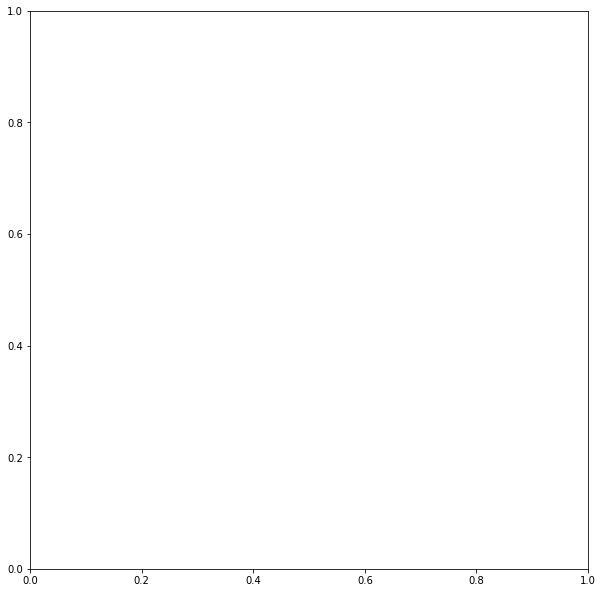

In [13]:
train_loader2 = DataLoader(train2, batch_size = 8, shuffle = True)

train_iter2  = iter(train_loader2)
images2, labels2 = next(train_iter2)

grid2 = makeGrid(images2)
fig = plt.figure(figsize = (10, 160))
plt.imshow(grid2)
plt.axis("off")
plt.title(labels2.numpy())
plt.show()